# 1. 단어 빈도와 TF-IDF 분석하기

In [1]:
import pandas as pd

# 엑셀 파일을 읽습니다.
data = pd.read_excel('연구문제3(아이모드 중단 전후 뉴스기사)_중복제거.xlsx')
# 첫 행을 제거합니다.
data = data.drop(data.index[0])

# txt 파일로 저장합니다.
data.to_csv('연구문제3(아이모드)_중복제거.txt', index=False, sep='\t')

In [3]:
from teanaps.nlp import SyntaxAnalyzer

sa = SyntaxAnalyzer()


### 연구문제3-1)

In [4]:
# TEANAPS 라이브러리를 불러옵니다.

from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing

In [33]:
# 키워드 빈도 확인

pro = Processing()
ma = MorphologicalAnalyzer()
ma.set_tagger("okt") # Okt 형태소 분석기 사용(한국어 텍스트 분석)

tokenized_sentence_list = []
PATH = '연구문제3(아이모드)_중복제거.txt'
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")
tokenized_sentence_list = []
line_count = 0
sample_dict = {}

for line in f:
    line_count += 1
    print(line_count, end = '\r')
    line = line.strip()
    col = line.split('\t')
    word_list = ma.parse(line)
    for word, pos, loc in word_list:
        if word != "" and pos in ["NNG", "NNP"]:
            if word in sample_dict.keys():
                sample_dict[word] += 1
            else:
                sample_dict[word] = 1

f.close()

sample_list = []

for word, count in sample_dict.items():
    sample_list.append([word, count])

sample_list.sort(key=lambda elem: elem[1], reverse=True)

for word, count in sample_list[:50]:
    print(word + "\t" + str(count))

버스	141
인천	139
운행	75
아이모드	70
응답	67
시	58
스마트	57
사업	52
등	42
교통	41
서비스	38
신도시	36
운영	36
노선	33
시티	32
도시	28
모빌리티	23
지역	23
송도	23
실증	23
를	23
호출	22
대중교통	22
주민	21
http	21
린지	19
앱	19
실시간	18
순환	17
중단	17
차량	17
국토교통부	17
공모	17
위해	16
종료	16
선정	16
수	16
증차	15
국내	15
도입	15
시범	14
이용	14
영종	14
수요	14
중인	14
경제	13
씨엘	13
시내버스	13
및	13
내년	13


In [6]:
# 데이터 개수,첫행은 분류체계이기에 데이터 개수에서 제외
line_count

92

In [34]:
document_list=[]
tokenized_sentence_list = []

PATH = "연구문제3(아이모드)_중복제거.txt"
POS_LIST = ["NNG", "NNP"]

count_all=[]

f = open(PATH, encoding="utf-8")

# 파일에서 기사본문만 추출하여 명사형 문장을 생성합니다.
for line in f:
    line = line.strip()
    col = line.split("\t") # [num,datetime,title,source,content,url]
    
     # 컬럼 수가 6개 미만이면, 해당 줄을 무시합니다.
    if len(col)<6 :
        continue
        
    #num = col[0]
    #datetime = col[1]         
    title = ' '.join(col[2].split())   # 제목의 불필요한 공백 제거      
    #source = col[3]
    content = ' '.join(col[4].split())  # 본문의 불필요한 공백 제거
    #url=col[5]

    # content에 대한 형태소 분석
    tagged_word_list_content = ma.parse(content)
    count_all.append(tagged_word_list_content)
    tokenized_sentence = pro.get_plain_text(tagged_word_list_content, pos_list=POS_LIST, tag=False)
    
    # title에 대한 형태소 분석
    tagged_word_list_title = ma.parse(title)
    count_all.append(tagged_word_list_title)
    tokenized_title = pro.get_plain_text(tagged_word_list_title, pos_list=POS_LIST, tag=False)
    
    # title과 content 형태소 분석 결과를 하나로 합침
    tokenized = tokenized_title + tokenized_sentence
    tokenized_sentence_list.append(tokenized)
    document_list.append([title,content])

f.close()

print(tokenized_sentence_list[:10])
print(document_list[:3])

['titlecontent', '신도시 응답 모빌리티 증차 운행신도시 응답 모빌리티 증차 운행 인천 시공사 신도시 입 주민 교통 편의 증진 위해 운영 응답 모빌리티 서비스 누적 이용자 수가 명 서비스 증차 운행 인천 시공사', '스톱 재개 민원 인천 시 대안 마련응답 버스 아이모드 운행 관련 민원 인천 시가 대안 마련 경인일보 취재 종합 인천 시 인천 의회 아이모드 운영 사 씨엘 등 최근 아이모드 관련 논의 지난해 끝 아이모드 사업 종료', '인천 시 종료 지역 대체 버스 노선 운행미니 버스 인천광역시 스마트 린지 시범 사업 이 종료 기존 시범 운행 지역 송도 종국 도시 시민 불편 해소 위해 지역별 대책 마련 시행 먼저 송도국제도시 순환 시내버스 노선 대한 최근 이동통신 데이터 분석 및 이용 실태 반영', '버스 시범 사업 종료 영종 송도 버스 노선 개편멀티 달 서비스 실증 사업 홍보물 인천 시가 응답 이동 수단 버스 시범 사업 종료 시범 운행 지역 영종 송도국제도시 시내버스 노선 개편 시 버스 시범 운행 종료 가운데 종국 도시 버스 노선 개 신설 추가', '인천 신도시 응답 모빌리티 서비스 연장운행인천 시공사 신도시 입 주민 교통 편의 증진 위해 시행 응답 모빌리티 서비스 서비스 연장 고 현재 신도시 버스 대가 입 주민 교통 지원 위해 운영 중 계양역 출퇴근', '인천 도시 응답 모빌리티 서비스 연장 운행인천 시공사 신도시 입 주민 교통 편의 위해 시행 응답 모빌리티 서비스 서비스 연장 고 현재 신도시 버스 대가 입 주민 교통 지원 위해 운영 중 수요 응답 모빌리티 서비스', '스마트폰 앱 호출 인천 신도시 버스 운행 연장인천 시공사 신도시 입 주민 교통 편의 위해 운행 중인 응답 버스 서비스 연장 고 당초 올해 말 운행 예정 신도시 버스 말 연장 운행 신도시 입 주민 증가', '종료 모드 운전기사 생계 막막기호일보 아침 여 신문 아이모드 버스 사진 인천 시청 제공 인천 시 응답 버스 아이모드 사업 기간 버스 운행 기사 일자리 처지 시 스마트 모빌리티 서비스

In [35]:
f = open(PATH, encoding="utf-8")
line = f.readline()
col = line.split("\t")
print("Number of columns: ", len(col))
f.close()

Number of columns:  6


In [36]:
# 전체 토큰개수 확인
all_count = 0
for i in range(0, len(count_all)):
    all_count += len(count_all[i])
print(all_count)

7767


In [37]:
# 명사 토큰개수 확인
noun_count = 0
for i in range(0, len(tokenized_sentence_list)):
    noun_count += len(tokenized_sentence_list[i].split(' '))
print(noun_count)

3686


In [38]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [39]:
# TF/TF-IDF 값을 계산합니다.
tfidf.calculation_tfidf(tokenized_sentence_list, tfidf_count=100, tfidf_state=True)

In [40]:
# 단어 x TF 매트릭스를 생성합니다.
tfidf.get_tf_matrix()

-im  //www.reuters  //www.reuters.com  ]  amp  art  assignment  \
0     0              0                  0  0    0    0           0   
1     0              0                  0  0    0    0           0   
2     0              0                  0  0    0    0           0   
3     0              0                  0  0    0    0           0   
4     0              0                  0  0    0    0           0   
..  ...            ...                ... ..  ...  ...         ...   
87    0              0                  0  0    0    0           0   
88    0              0                  0  0    0    0           0   
89    0              0                  0  2    0    0           0   
90    0              0                  0  0    0    0           1   
91    0              0                  0  0    0    0           0   

    atmosphere  business  c  center  chairman  cheon-soo  cheongju  \
0            0         0  0       0         0          0         0   
1            0         0  0       0         0          0         0   
2            0         0  0       0         0          0         0   
3            0         0  0       0         0          0         0   
4            0         0  0       0         0          0         0   
..         ...       ... ..     ...       ...        ...       ...   
87           0         0  0       0         0          0         0   
88           0         0  0       0         0          0         0   
89           0         0  0       0         0          0         0   
90           0         0  0       0         0          0         0   
91           0         0  0       0         1          0         0   

    chungcheongnam-do  city  class  club  co.  \
0                   0     0      0     0    0   
1                   0     0      0     0    0   
2                   0     0      0     0    0   
3                   0     0      0     0    0   
4                   0     0      0     0    0   
..                ...   ...    ...   ...  ...   
87                  0     0      0     0    0   
88                  0     0      0     0    0   
89                  0     0      0     0    0   
90                  0     0      3     0    0   
91                  1     0      0     0    0   

    com/articles/joe-biden-2024-presidential-re-election-campaign-87ef002b  \
0                                                   0                        
1                                                   0                        
2                                                   0                        
3                                                   0                        
4                                                   0                        
..                                                ...                        
87                                                  0                        
88                                                  0                        
89                                                  0                        
90                                                  0                        
91                                                  0                        

    dance  debate  entrant  everyone  executive  governor  growth  hall  hand  \
0       0       0        0         0          0         0       0     0     0   
1       0       0        0         0          0         0       0     0     0   
2       0       0        0         0          0         0       0     0     0   
3       0       0        0         0          0         0       0     0     0   
4       0       0        0         0          0         0       0     0     0   
..    ...     ...      ...       ...        ...       ...     ...   ...   ...   
87      0       0        0         0          0         0       0     0     0   
88      0       0        0         0          0         0       0     0     0   
89      0       0        0         0          0         0       0  

In [41]:
# 단어 x TF-IDF 매트릭스를 생성합니다.
tfidf.get_tfidf_matrix()

-im  //www.reuters  //www.reuters.com         ]  amp  art  assignment  \
0   0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
1   0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
2   0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
3   0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
4   0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
..  ...            ...                ...       ...  ...  ...         ...   
87  0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
88  0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   
89  0.0            0.0                0.0  0.397338  0.0  0.0    0.000000   
90  0.0            0.0                0.0  0.000000  0.0  0.0    0.197745   
91  0.0            0.0                0.0  0.000000  0.0  0.0    0.000000   

    atmosphere  business    c  center  chairman  cheon-soo  cheongju  \
0          0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
1          0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
2          0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
3          0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
4          0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
..         ...       ...  ...     ...       ...        ...       ...   
87         0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
88         0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
89         0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
90         0.0       0.0  0.0     0.0  0.000000        0.0       0.0   
91         0.0       0.0  0.0     0.0  0.208826        0.0       0.0   

    chungcheongnam-do  city     class  club  co.  \
0            0.000000   0.0  0.000000   0.0  0.0   
1            0.000000   0.0  0.000000   0.0  0.0   
2            0.000000   0.0  0.000000   0.0  0.0   
3            0.000000   0.0  0.000000   0.0  0.0   
4            0.000000   0.0  0.000000   0.0  0.0   
..                ...   ...       ...   ...  ...   
87           0.000000   0.0  0.000000   0.0  0.0   
88           0.000000   0.0  0.000000   0.0  0.0   
89           0.000000   0.0  0.000000   0.0  0.0   
90           0.000000   0.0  0.593234   0.0  0.0   
91           0.208826   0.0  0.000000   0.0  0.0   

    com/articles/joe-biden-2024-presidential-re-election-campaign-87ef002b  \
0                                                 0.0                        
1                                                 0.0                        
2                                                 0.0                        
3                                                 0.0                        
4                                                 0.0                        
..                                                ...                        
87                                                0.0                        
88                                                0.0                        
89                                                0.0                        
90                                                0.0                        
91                                                0.0                        

       dance    debate  entrant  everyone  executive  governor  growth  hall  \
0   0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
1   0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
2   0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
3   0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
4   0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
..       ...       ...      ...       ...        ...       ...     ...   ...   
87  0.000000  0.000000      0.0       0.0        0.0  0.000000     0.0   0.0   
88  0.000000

In [42]:
# TF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tf_dict()

{'titlecontent': 1,
 '신도시': 35,
 '응답': 65,
 '모빌리티': 23,
 '증차': 12,
 '운행신도시': 1,
 '운행': 69,
 '시공사': 12,
 '입': 10,
 '교통': 41,
 '편의': 7,
 '증진': 2,
 '운영': 35,
 '서비스': 38,
 '누적': 5,
 '이용자': 5,
 '수가': 2,
 '명': 6,
 '스톱': 1,
 '재개': 1,
 '민원': 2,
 '대안': 4,
 '마련응답': 1,
 '시가': 6,
 '마련': 5,
 '경인일보': 1,
 '취재': 1,
 '종합': 2,
 '의회': 1,
 '사': 2,
 '씨엘': 10,
 '최근': 9,
 '논의': 3,
 '지난해': 6,
 '끝': 3,
 '사업': 52,
 '종료': 15,
 '대체': 2,
 '노선': 33,
 '운행미니': 1,
 '시범': 14,
 '기존': 2,
 '송도': 23,
 '도시': 28,
 '불편': 7,
 '해소': 3,
 '지역별': 1,
 '대책': 8,
 '시행': 4,
 '먼저': 2,
 '송도국제도시': 10,
 '순환': 17,
 '시내버스': 13,
 '이동통신': 6,
 '데이터': 7,
 '분석': 1,
 '실태': 6,
 '반영': 10,
 '영종': 14,
 '개편멀티': 1,
 '달': 4,
 '실증': 23,
 '홍보물': 1,
 '이동': 10,
 '수단': 9,
 '개편': 1,
 '가운데': 4,
 '신설': 2,
 '추가': 1,
 '연장운행인천': 1,
 '연장': 7,
 '고': 6,
 '대가': 7,
 '지원': 6,
 '계양역': 6,
 '출퇴근': 6,
 '운행인천': 1,
 '수요': 15,
 '스마트폰': 8,
 '앱': 19,
 '호출': 22,
 '연장인천': 1,
 '당초': 1,
 '올해': 9,
 '예정': 4,
 '증가': 2,
 '운전기사': 5,
 '생계': 2,
 '막막기호일보': 1,
 '아침': 2,
 '여': 2,
 '신문': 3,
 '사

In [43]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()[:60]

[['운행', 69],
 ['응답', 65],
 ['사업', 52],
 ['교통', 41],
 ['서비스', 38],
 ['신도시', 35],
 ['운영', 35],
 ['노선', 33],
 ['시티', 32],
 ['도시', 28],
 ['모빌리티', 23],
 ['송도', 23],
 ['실증', 23],
 ['호출', 22],
 ['대중교통', 21],
 ['앱', 19],
 ['실시간', 19],
 ['순환', 17],
 ['차량', 17],
 ['공모', 17],
 ['국토교통부', 16],
 ['종료', 15],
 ['수요', 15],
 ['중단', 15],
 ['도입', 15],
 ['시범', 14],
 ['영종', 14],
 ['국내', 14],
 ['시내버스', 13],
 ['내년', 13],
 ['증차', 12],
 ['시공사', 12],
 ['최초', 12],
 ['플랫폼', 12],
 ['선정', 12],
 ['스타트업', 12],
 ['재', 11],
 ['또', 11],
 ['국가', 11],
 ['존', 11],
 ['입', 10],
 ['씨엘', 10],
 ['송도국제도시', 10],
 ['반영', 10],
 ['이동', 10],
 ['제공', 10],
 ['국토부', 10],
 ['승객', 10],
 ['기술', 10],
 ['최근', 9],
 ['수단', 9],
 ['올해', 9],
 ['예산', 9],
 ['통해', 9],
 ['배차', 9],
 ['참여', 9],
 ['http', 9],
 ['대책', 8],
 ['스마트폰', 8],
 ['택시', 8]]

In [44]:
# TF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tf_list()

[['운행', 69],
 ['응답', 65],
 ['사업', 52],
 ['교통', 41],
 ['서비스', 38],
 ['신도시', 35],
 ['운영', 35],
 ['노선', 33],
 ['시티', 32],
 ['도시', 28],
 ['모빌리티', 23],
 ['송도', 23],
 ['실증', 23],
 ['호출', 22],
 ['대중교통', 21],
 ['앱', 19],
 ['실시간', 19],
 ['순환', 17],
 ['차량', 17],
 ['공모', 17],
 ['국토교통부', 16],
 ['종료', 15],
 ['수요', 15],
 ['중단', 15],
 ['도입', 15],
 ['시범', 14],
 ['영종', 14],
 ['국내', 14],
 ['시내버스', 13],
 ['내년', 13],
 ['증차', 12],
 ['시공사', 12],
 ['최초', 12],
 ['플랫폼', 12],
 ['선정', 12],
 ['스타트업', 12],
 ['재', 11],
 ['또', 11],
 ['국가', 11],
 ['존', 11],
 ['입', 10],
 ['씨엘', 10],
 ['송도국제도시', 10],
 ['반영', 10],
 ['이동', 10],
 ['제공', 10],
 ['국토부', 10],
 ['승객', 10],
 ['기술', 10],
 ['최근', 9],
 ['수단', 9],
 ['올해', 9],
 ['예산', 9],
 ['통해', 9],
 ['배차', 9],
 ['참여', 9],
 ['http', 9],
 ['대책', 8],
 ['스마트폰', 8],
 ['택시', 8],
 ['추진', 8],
 ['가장', 8],
 ['편의', 7],
 ['불편', 7],
 ['데이터', 7],
 ['연장', 7],
 ['대가', 7],
 ['사진', 7],
 ['인승', 7],
 ['리빙랩', 7],
 ['이번', 7],
 ['자율', 7],
 ['간격', 7],
 ['대로', 7],
 ['광역', 7],
 ['도심', 7],
 ['명', 6],
 ['시가'

In [45]:
# TF-IDF 계산결과를 딕셔너리 형태로 불러옵니다.
tfidf.get_tfidf_dict()

{'운행': 5.279910619568033,
 '응답': 4.196248284331018,
 '사업': 4.118701687892433,
 '교통': 3.5575244512029394,
 '서비스': 3.5051801435558336,
 '신도시': 3.841742415446188,
 '운영': 2.758229706047207,
 '노선': 3.339953111058967,
 '시티': 2.972841349496697,
 '도시': 2.517904795221233,
 '모빌리티': 2.6392636551246724,
 '송도': 2.50325642030831,
 '실증': 2.2673128345806592,
 '호출': 2.4027688050843796,
 '대중교통': 2.1852358937952605,
 '앱': 2.284034701379411,
 '실시간': 2.047899640313314,
 '순환': 2.055837899582904,
 '차량': 1.990776098499397,
 '공모': 2.0029951146152523,
 '국토교통부': 1.8157115181894734,
 '종료': 1.8533191866353662,
 '수요': 1.879145298632772,
 '중단': 1.8787345222744682,
 '도입': 1.8311190749147577,
 '시범': 1.8895296492785265,
 '영종': 1.7699933900167701,
 '국내': 1.6980444931557046,
 '시내버스': 1.4713911100397135,
 '내년': 1.8089361147866778,
 '증차': 1.5999246114783707,
 '시공사': 1.6048663718278902,
 '최초': 1.4949849859199391,
 '플랫폼': 1.4310458315016532,
 '선정': 1.4526848653313291,
 '스타트업': 1.5671269324298382,
 '재': 1.3640959452161259,
 '

In [46]:
# TF-IDF 계산결과를 리스트 형태로 불러옵니다.
tfidf.get_tfidf_list()[:20]

[['운행', 5.279910619568033],
 ['응답', 4.196248284331018],
 ['사업', 4.118701687892433],
 ['신도시', 3.841742415446188],
 ['교통', 3.5575244512029394],
 ['서비스', 3.5051801435558336],
 ['노선', 3.339953111058967],
 ['시티', 2.972841349496697],
 ['운영', 2.758229706047207],
 ['모빌리티', 2.6392636551246724],
 ['도시', 2.517904795221233],
 ['송도', 2.50325642030831],
 ['호출', 2.4027688050843796],
 ['앱', 2.284034701379411],
 ['실증', 2.2673128345806592],
 ['대중교통', 2.1852358937952605],
 ['순환', 2.055837899582904],
 ['실시간', 2.047899640313314],
 ['공모', 2.0029951146152523],
 ['차량', 1.990776098499397]]

In [47]:
# 전체 문서의 단어주머니를 불러옵니다.
tfidf.get_word_list()[:20]

['titlecontent',
 '신도시',
 '응답',
 '모빌리티',
 '증차',
 '운행신도시',
 '운행',
 '시공사',
 '입',
 '교통',
 '편의',
 '증진',
 '운영',
 '서비스',
 '누적',
 '이용자',
 '수가',
 '명',
 '스톱',
 '재개']

In [21]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(50)

### TF-IDF 기준 워드클라우드

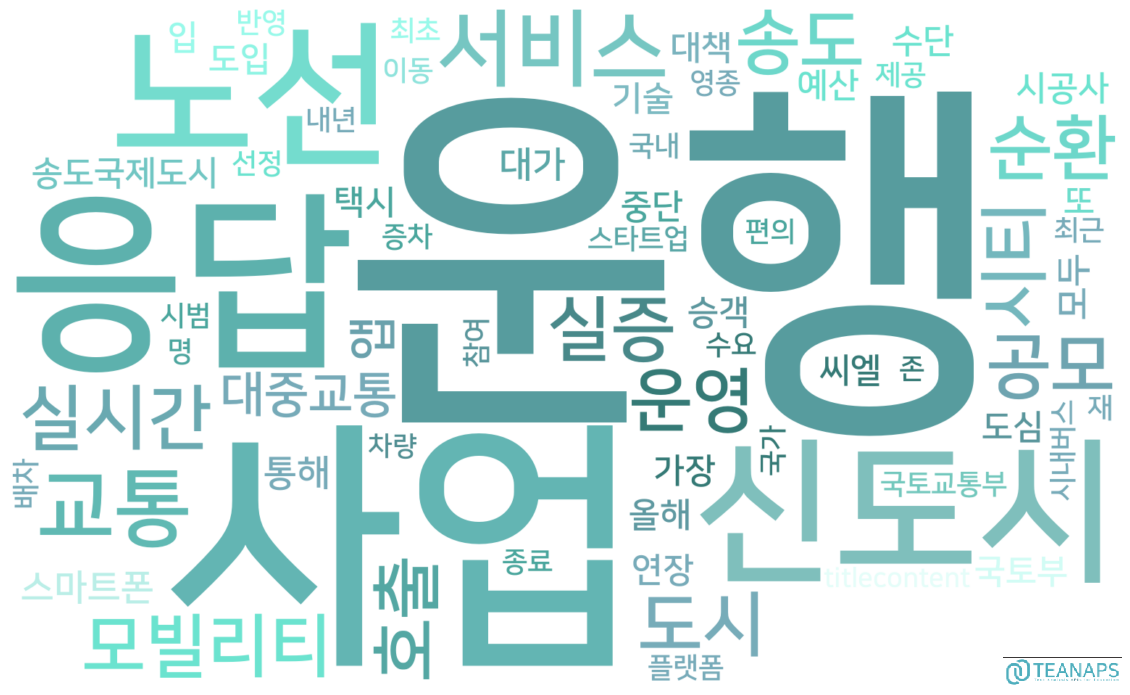

In [49]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

### 불용어, 동의어 처리하기 

In [22]:
from teanaps.nlp import Processing

pro = Processing()

In [28]:
result=pro.remove_stopword(["씨엘","문제","문제점","민원"])

In [23]:
# 전체 불용어 리스트를 불러옵니다.
result = pro.get_stopword()
print(result[-10:])

['외', '젠', '늘', '고해', '포기', '커리', '기본', '라면', '둘째', '안될까']


In [29]:
# 불용어를 리스트 단위로 추가합니다.
pro.add_stopword(['스마트','를','종국','관련','린지''해당', '시민', '지역', '경우', '현재', '현황', '제안', '지역', '생각', '부처', '이용', '우리', '인천', '군', '것', '및', '시', '수', '모든', '등', '처리', '때문', '안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그','린지','중인'])

result = pro.get_stopword()
print(result)

['안녕하십니까', '위', '개', '곳', '앞', '후', '또한', '류지', '때', '함', '비', '결과', '다른', '그', '해당', '것', '군', '현재', '제안', '부처', '및', '등', '사람', '인천시', '인천광역시', '현황', '시민', '시', '수', '인천', '모든', '지역', '처리', '제', '대한', '이용', '사용', '이', '내', '저', '중', '위해', '때문', '내', '온', '위해', '임', '생각', '주민', '경우', '알', '일', '은', '항', '로', '각', '수고', '음', '타고', '분', '글', '요', '전', '거', '무', '안', '인사', '진짜', '네', '오', '번', '엄마', '뭐', '좀', '아이', '모드', '많', '없', '같', '있', '그렇', '맘', '플', '차', '같아요', '아이모드', '있어요', '입니다', '해', '있는', '우리', '린지', '중인', '를', '종국', '관련', '린지해당', '스마트', '버스', '공구', '공', '타', '햇', '듯', '넵', '돌', '만', '시댁', '남편', '애', '말', '보지', '초', '낮', '외', '젠', '늘', '고해', '포기', '커리', '기본', '라면', '둘째', '안될까']


In [31]:
# 동의어 처리
pro.add_synonym({'문제점':['문제점','문제']})
result=pro.get_synonym()
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '시민': ['시민', '주민', '사람'], '현재': ['현재', '현황'], '인천광역시': ['인천광역시', '인천시', '인천'], '현황': ['현황', '상태', '실정'], '아이모드': ['아이모드', '아이', '모드'], '영종하늘도시': ['영종하늘도시', '영종', '하늘', '도시'], '대중교통': ['대중교통', '교통'], '검단신도시': ['검단신도시', '검단', '신도시'], '문제점': ['문제점', '문제']}


In [32]:
# 동의어 처리
result = pro.get_synonym() # 딕셔너리 형태로 정의가 되어 있음. 추가할 때도 딕셔너리 형태로 추가하면 됨.
print(result)

{'맨체스터 유나이티드': ['맨체스터 유나이티드', '맨유'], '아이폰': ['아이폰', 'iphone', '사과폰', '아이폰3s', '아이폰3', '아이폰6', '아이폰x'], '시민': ['시민', '주민', '사람'], '현재': ['현재', '현황'], '인천광역시': ['인천광역시', '인천시', '인천'], '현황': ['현황', '상태', '실정'], '아이모드': ['아이모드', '아이', '모드'], '영종하늘도시': ['영종하늘도시', '영종', '하늘', '도시'], '대중교통': ['대중교통', '교통'], '검단신도시': ['검단신도시', '검단', '신도시'], '문제점': ['문제점', '문제']}


### LDA

In [50]:
from teanaps.text_analysis import TopicClustering

tc = TopicClustering()

#### 토픽모델링 수행하기

In [51]:
NUM_TOPICS = 6     # 주제의 개수
NUM_KEYWORDS = 15  # 주제별 키워드 개수

lda_result = tc.topic_modeling("lda", tokenized_sentence_list, NUM_TOPICS, NUM_KEYWORDS)
lda_result

[(0,
  [('http', 0.012450253),
   ('운행', 0.012151469),
   ('연수구', 0.010023664),
   ('문제', 0.007585216),
   ('응답', 0.007092169),
   ('실시간', 0.006372872),
   ('사업', 0.0059194462),
   ('교통', 0.005749876),
   ('예산', 0.0052255187),
   ('명', 0.00522228),
   ('의결', 0.00522015),
   ('채택', 0.0052197776),
   ('대선', 0.005218759),
   ('바이든', 0.0052180965),
   ('공식', 0.005217924)]),
 (1,
  [('사업', 0.029646302),
   ('운행', 0.027744344),
   ('교통', 0.016523048),
   ('종료', 0.013184832),
   ('응답', 0.013001764),
   ('국내', 0.012409737),
   ('시티', 0.011713999),
   ('대중교통', 0.011158879),
   ('서비스', 0.010736758),
   ('도입', 0.0107005825),
   ('최초', 0.010694217),
   ('운영', 0.010616338),
   ('앱', 0.010360859),
   ('호출', 0.010223506),
   ('중단', 0.010043616)]),
 (2,
  [('응답', 0.021329548),
   ('시티', 0.020512039),
   ('사업', 0.018010432),
   ('도시', 0.014069906),
   ('운영', 0.011340084),
   ('공모', 0.0113075245),
   ('교통', 0.011275264),
   ('실증', 0.011256023),
   ('선정', 0.0085319625),
   ('제공', 0.00851968),
   ('국토교통부'

#### 군집화 결과를 시각화하여 확인하기

In [52]:
lda_model = tc.get_model()
tc.display_model_result(lda_model)

#### 군집화 결과 평가하기: Perplexity, Coherence

In [53]:
perplexity, coherence = tc.get_model_validation_result()
perplexity, coherence    # perplexity: 혼잡도, coherence: 일관성

(-6.705281765875625, 0.43271891253129335)

In [54]:
MAX_TOPICS = 10 

tc.set_plotly()
tc.get_model_validation_graph("lda", tokenized_sentence_list, MAX_TOPICS)

## 네트워크 분석

In [109]:
from teanaps.text_analysis import CoWordCalculator

co = CoWordCalculator()

In [110]:
node_list = ["운행","교통","응답","수요","노선","신도시","실증","모빌리티","빈번","예산","종료","확대","대중교통","서비스","호출","송도","영종","검단","증차","종료"]

In [111]:
co.calculation_co_matrix(tokenized_sentence_list, node_list=node_list)

In [112]:
edge_list = co.get_edge_list()[:20]
edge_list

[(('운행', '운행'), 77),
 (('응답', '응답'), 67),
 (('서비스', '서비스'), 48),
 (('교통', '교통'), 43),
 (('노선', '노선'), 41),
 (('신도시', '신도시'), 39),
 (('모빌리티', '모빌리티'), 25),
 (('송도', '송도'), 25),
 (('실증', '실증'), 23),
 (('호출', '호출'), 22),
 (('대중교통', '대중교통'), 21),
 (('응답', '서비스'), 19),
 (('서비스', '응답'), 19),
 (('종료', '종료'), 15),
 (('수요', '수요'), 15),
 (('신도시', '교통'), 14),
 (('교통', '신도시'), 14),
 (('증차', '증차'), 14),
 (('영종', '영종'), 14),
 (('응답', '모빌리티'), 13)]

In [113]:
node_list = co.get_node_list()
node_list

['운행',
 '응답',
 '서비스',
 '교통',
 '노선',
 '신도시',
 '모빌리티',
 '송도',
 '실증',
 '호출',
 '대중교통',
 '종료',
 '수요',
 '증차',
 '영종',
 '예산',
 '빈번',
 '검단',
 '확대']

In [115]:
co_word_list = co.get_co_word("운행")
co_word_list

[('신도시', 11),
 ('종료', 9),
 ('호출', 9),
 ('노선', 7),
 ('응답', 6),
 ('증차', 5),
 ('교통', 5),
 ('실증', 5),
 ('영종', 4),
 ('대중교통', 4),
 ('서비스', 3),
 ('송도', 3),
 ('예산', 3),
 ('모빌리티', 2),
 ('수요', 1),
 ('확대', 1)]

In [116]:
centrality_dict = co.get_centrality("d_cent") # 연결중심성
centrality_dict

{'운행': 1.0,
 '응답': 0.8888888888888888,
 '서비스': 0.8333333333333333,
 '교통': 0.7222222222222222,
 '노선': 0.7777777777777777,
 '신도시': 0.8333333333333333,
 '모빌리티': 0.5555555555555556,
 '송도': 0.7222222222222222,
 '실증': 0.4444444444444444,
 '호출': 0.6666666666666666,
 '대중교통': 0.6666666666666666,
 '종료': 0.5,
 '수요': 0.7222222222222222,
 '증차': 0.5,
 '영종': 0.7222222222222222,
 '예산': 0.2777777777777778,
 '빈번': 0.16666666666666666,
 '검단': 0.2777777777777778,
 '확대': 0.38888888888888884}

In [117]:
centrality_dict = co.get_centrality("c_cent")
centrality_dict

{'운행': 0.9,
 '응답': 0.8181818181818182,
 '서비스': 0.782608695652174,
 '교통': 0.72,
 '노선': 0.75,
 '신도시': 0.782608695652174,
 '모빌리티': 0.6428571428571429,
 '송도': 0.6923076923076923,
 '실증': 0.5806451612903226,
 '호출': 0.6923076923076923,
 '대중교통': 0.6666666666666666,
 '종료': 0.6,
 '수요': 0.72,
 '증차': 0.6206896551724138,
 '영종': 0.6923076923076923,
 '예산': 0.5294117647058824,
 '빈번': 0.42857142857142855,
 '검단': 0.5142857142857142,
 '확대': 0.5625}

In [118]:
centrality_dict = co.get_centrality("b_cent")
centrality_dict

{'운행': 0.12840942644864217,
 '응답': 0.048608617236068206,
 '서비스': 0.038901058999098216,
 '교통': 0.02201991907874261,
 '노선': 0.03613106211145427,
 '신도시': 0.07944907307652405,
 '모빌리티': 0.0015873015873015873,
 '송도': 0.030862202430829877,
 '실증': 0.005291005291005292,
 '호출': 0.015110488639900404,
 '대중교통': 0.022520489677352422,
 '종료': 0.007487011898776604,
 '수요': 0.12275092373131591,
 '증차': 0.0006535947712418301,
 '영종': 0.04806096227664855,
 '예산': 0.0,
 '빈번': 0.0,
 '검단': 0.0,
 '확대': 0.0}

In [121]:
centrality_dict = co.get_centrality("d_cent")
co.get_word_network_graph(centrality_dict, mode="markers+text", 
                          centrality_th=0.01, weight_th=1, node_size_rate=5, edge_width_rate=5, 
                          ego_node_list=["운행","예산","교통","빈번","확대"])

In [122]:
centrality_dict = co.get_centrality("d_cent")
co.get_word_network_graph(centrality_dict, mode="markers+text", 
                          centrality_th=0.01, weight_th=1, node_size_rate=10, edge_width_rate=10, 
                          ego_node_list=["영종", "송도", "검단"])